In [157]:
import pandas as pd
import numpy as np
from scipy import stats

In [158]:
data = pd.read_table('data/dev.tsv')
test = pd.read_table('data/eval.tsv')

In [159]:
df = data.copy()
eval = test.copy()
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,mode
0,0.7060,1963,0.334,['The Beatles'],0.527,120853,0.4800,0,6EHuOufBeL6vk3TvVJB5qo,0.000000,4,0.0702,-9.610,61,0.0280,139.388,1
1,0.0324,1953,0.954,"['Richard Strauss', 'Arturo Toscanini']",0.192,322693,0.0373,0,19RcQUOpftf7DqH0RogEQs,0.519000,5,0.1430,-28.496,0,0.0406,79.257,0
2,0.2590,1964,0.864,"['Monica Zetterlund', 'Bill Evans Trio']",0.500,282533,0.2070,0,7BT5Abw12iVWLVo1tKb9Qu,0.000696,0,0.1060,-16.817,29,0.0391,94.662,0
3,0.3630,1963,0.825,['Roy Orbison'],0.508,140307,0.2890,0,1UgHqzVHOYpqM0rjm81ZYA,0.001240,5,0.1430,-11.068,22,0.0244,93.240,1
4,0.8640,1973,0.520,"['Héctor Lavoe', 'Willie Colón', 'Yomo Toro']",0.636,269520,0.6790,0,1uohFd173KrmJiDjiOooLw,0.000000,7,0.0601,-6.410,41,0.0690,93.914,1


In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,136522.0,0.528540,0.263282,0.0,0.3170,0.540000,0.7470,1.000
year,136522.0,1976.796048,25.921025,1921.0,1956.0000,1977.000000,1999.0000,2020.000
acousticness,136522.0,0.502159,0.376037,0.0,0.1020,0.516000,0.8930,0.996
danceability,136522.0,0.537497,0.175972,0.0,0.4150,0.548000,0.6680,0.988
duration_ms,136522.0,231061.453041,127800.577241,5991.0,169933.0000,207493.000000,262267.0000,5403500.000
energy,136522.0,0.482298,0.267538,0.0,0.2550,0.471000,0.7030,1.000
explicit,136522.0,0.084411,0.278005,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,136522.0,0.167172,0.313448,0.0,0.0000,0.000218,0.1030,1.000
key,136522.0,5.193200,3.513427,0.0,2.0000,5.000000,8.0000,11.000
liveness,136522.0,0.205708,0.174404,0.0,0.0989,0.136000,0.2610,1.000


In [161]:
def nan_analysis(df):
    nans = []
    for col in df.columns:
        nans.append([col,df[col].isnull().sum()])

    return pd.DataFrame(nans,columns=['columns','nan counts'])

nans_df = nan_analysis(df)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           136522 non-null  float64
 1   year              136522 non-null  int64  
 2   acousticness      136522 non-null  float64
 3   artists           136522 non-null  object 
 4   danceability      136522 non-null  float64
 5   duration_ms       136522 non-null  int64  
 6   energy            136522 non-null  float64
 7   explicit          136522 non-null  int64  
 8   id                136522 non-null  object 
 9   instrumentalness  136522 non-null  float64
 10  key               136522 non-null  int64  
 11  liveness          136522 non-null  float64
 12  loudness          136522 non-null  float64
 13  popularity        136522 non-null  int64  
 14  speechiness       136522 non-null  float64
 15  tempo             136522 non-null  float64
 16  mode              13

Id, artists is categorical - others is numerical

In [163]:
def skew_kurt(df):
    sku = []
    for col in df.columns:
        if col not in ['id','artists']:
            sku.append([col,
                        df[col].kurt(),
                        np.log(df[col]).kurt(),
                        np.sqrt(df[col]).kurt(),
                        df[col].skew(),
                        np.log(df[col]).skew(),
                        np.sqrt(df[col]).skew()
                        ]
                       )

    return pd.DataFrame(sku,columns=['columns','kurt','log kurt','sqrt kurt','skew','log skew','sqrt skew'])

sku = skew_kurt(df)
sku

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,columns,kurt,log kurt,sqrt kurt,skew,log skew,sqrt skew
0,valence,-1.064927,NaN,-0.342404,-0.106713,NaN,-0.647737
1,year,-1.035393,-1.025786,-1.030697,-0.129524,-0.148236,-0.138871
2,acousticness,-1.609341,NaN,-1.252081,-0.032344,NaN,-0.465407
3,danceability,-0.439431,NaN,0.930119,-0.227141,NaN,-0.798956
4,duration_ms,145.804417,3.901500,16.008356,7.725343,-0.060583,2.143917
5,energy,-1.099952,NaN,-0.601682,0.112118,NaN,-0.447452
6,explicit,6.939246,NaN,6.939246,2.989840,NaN,2.989840
7,instrumentalness,0.933780,NaN,0.005635,1.628427,NaN,1.307247
8,key,-1.269181,NaN,-0.491781,0.008761,NaN,-0.757788
9,liveness,5.019822,NaN,1.485129,2.155729,NaN,1.301045


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

def dist_plot_by_class(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col)
    sns.distplot(df[df['mode']==0][col],
                 color="green", kde=True,bins=120, label='mode 0')
    sns.distplot(df[df['mode']==1][col],color="red", kde=True,bins=120, label='mode 1')
    plt.legend()
    plt.show()

def dist_plot_log_by_class(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col+" log transformation")
    sns.distplot(np.log(df[df['mode']==0][col]),
                 color="green", kde=True,bins=120, label='mode 0')
    sns.distplot(np.log(df[df['mode']==1][col]),color="red", kde=True,bins=120, label='mode 1')
    plt.legend()
    plt.show()

def dist_plot(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col+" log transformation")
    sns.distplot(df[col],
                 color="green", kde=True,bins=120, label='mode 0')
    plt.legend()
    plt.show()

def dist_plot_log(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col+" log transformation")
    sns.distplot(np.log(df[col]),
                 color="green", kde=True,bins=120, label='mode 0')
    plt.legend()
    plt.show()

def dist_plot_sqrt_by_class(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col+" sqrt transformation")
    sns.distplot(np.sqrt(df[df['mode']==0][col]),
                 color="green", kde=True,bins=120, label='mode 0')
    sns.distplot(np.sqrt(df[df['mode']==1][col]),color="red", kde=True,bins=120, label='mode 1')
    plt.legend()
    plt.show()

def dist_plot_sqrt(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col+" sqrt transformation")
    sns.distplot(np.sqrt(df[col]),
                 color="green", kde=True,bins=120, label='mode 0')
    plt.legend()
    plt.show()


def dist_plot_box_cox_by_class(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col+" box cox transformation")
    sns.distplot(stats.boxcox(df[df['mode']==0][col])[0],
                 color="green", kde=True,bins=120, label='mode 0')
    sns.distplot(stats.boxcox(df[df['mode']==1][col])[0],color="red", kde=True,bins=120, label='mode 1')
    plt.legend()
    plt.show()

def dist_plot_box_cox(df,col):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of "+col+" box cox transformation")
    sns.distplot(stats.boxcox(df[col])[0],
                 color="green", kde=True,bins=120, label='mode 0')
    plt.legend()
    plt.show()

def box_plot(df,col):
    plt.figure(figsize=(16,6))
    sns.boxplot(data=df,y=col,x='mode',hue='mode')
    plt.legend()
    plt.show()

def violin_plot(df,col):
    plt.figure(figsize=(16,6))
    sns.violinplot(data=df,y=col,x='mode',hue='mode')
    plt.legend()
    plt.show()



def box_plot_log(df,col):
    plt.figure(figsize=(16,6))
    sns.boxplot(data=np.log(df[[col,'mode']]),y=col,x='mode',hue='mode')
    plt.legend()
    plt.show()

def violin_plot_log(df,col):
    plt.figure(figsize=(16,6))
    sns.violinplot(data=np.log(df[[col,'mode']]),y=col,x='mode',hue='mode')
    plt.legend()
    plt.show()

def box_plot_sqrt(df,col):
    plt.figure(figsize=(16,6))
    sns.boxplot(data=np.sqrt(df[[col,'mode']]),y=col,x='mode',hue='mode')
    plt.legend()
    plt.show()

def violin_plot_sqrt(df,col):
    plt.figure(figsize=(16,6))
    sns.violinplot(data=np.sqrt(df[[col,'mode']]),y=col,x='mode',hue='mode')
    plt.legend()
    plt.show()

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mode', ylabel='count'>

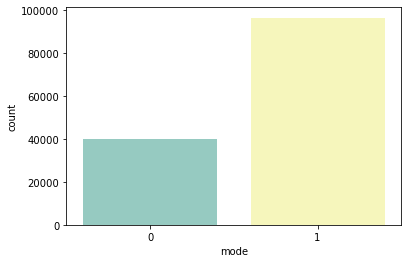

In [165]:
sns.countplot(df['mode'], palette='Set3')

#data set is imbalance

Column valence

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


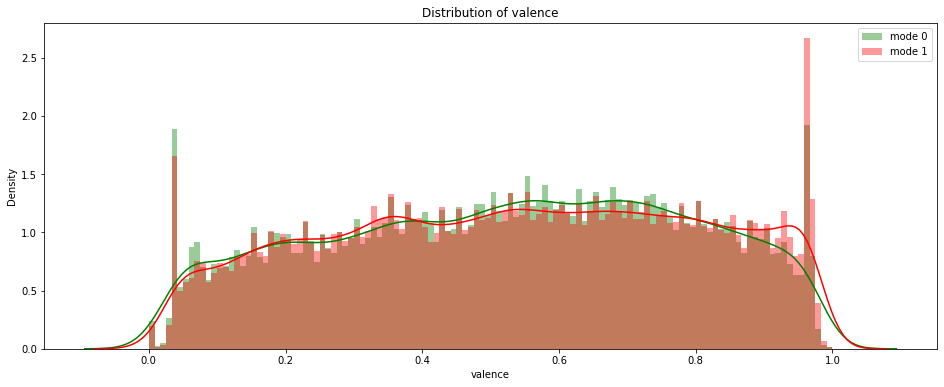

In [166]:

dist_plot_by_class(df,col='valence')

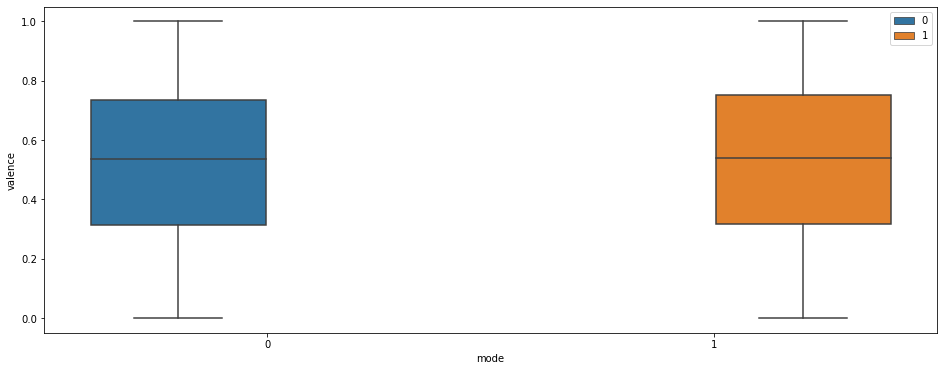

In [167]:
box_plot(df,col='valence')

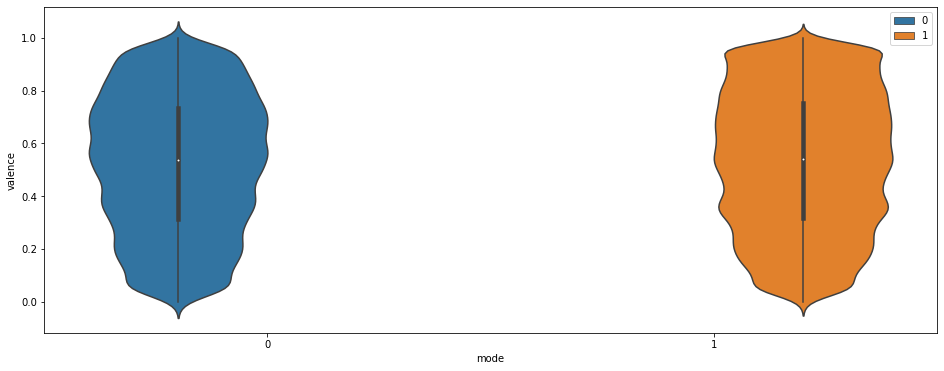

In [168]:
violin_plot(df,col='valence')

YEAR

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


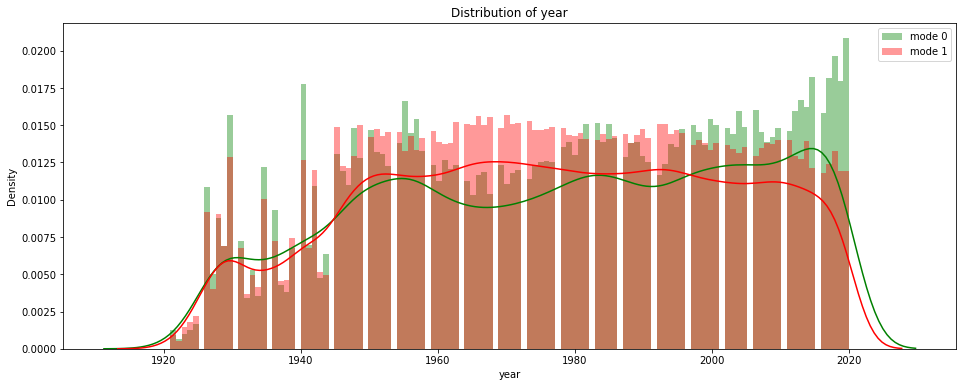

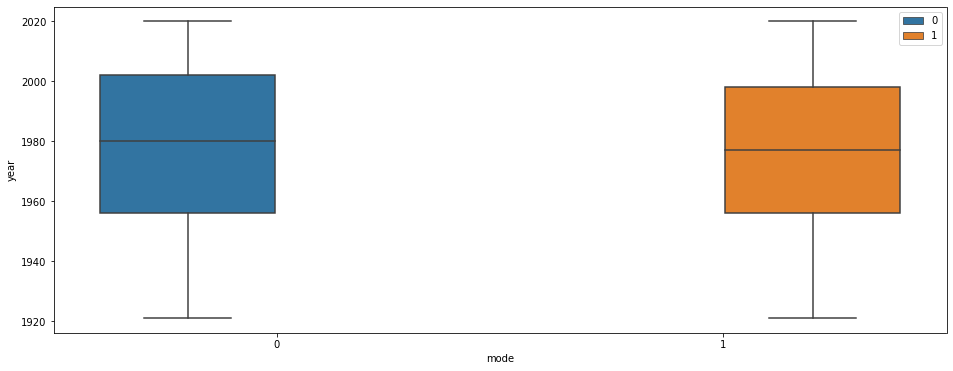

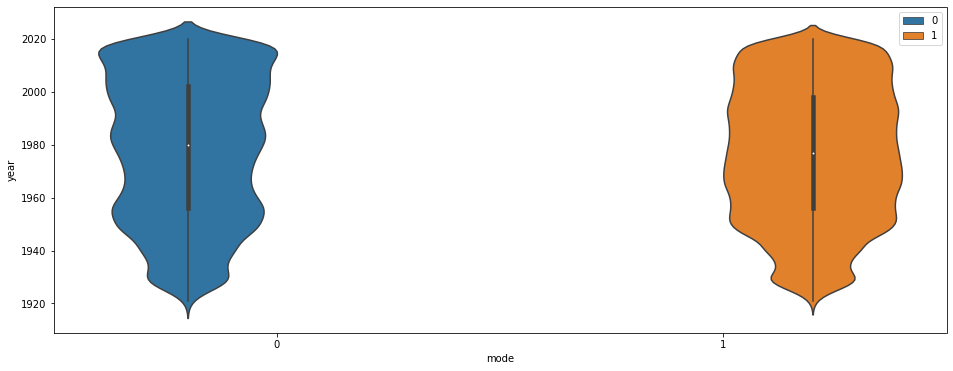

In [169]:
dist_plot_by_class(df,col='year')

box_plot(df,col='year')
violin_plot(df,col='year')



acousticness

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


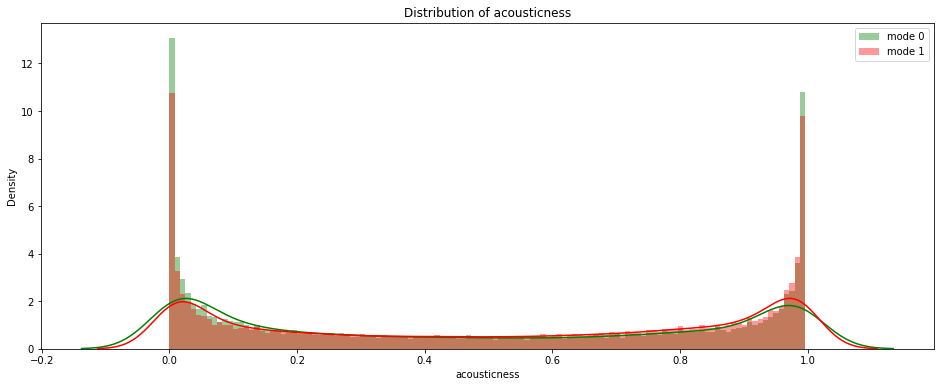

In [170]:
dist_plot_by_class(df,col='acousticness')

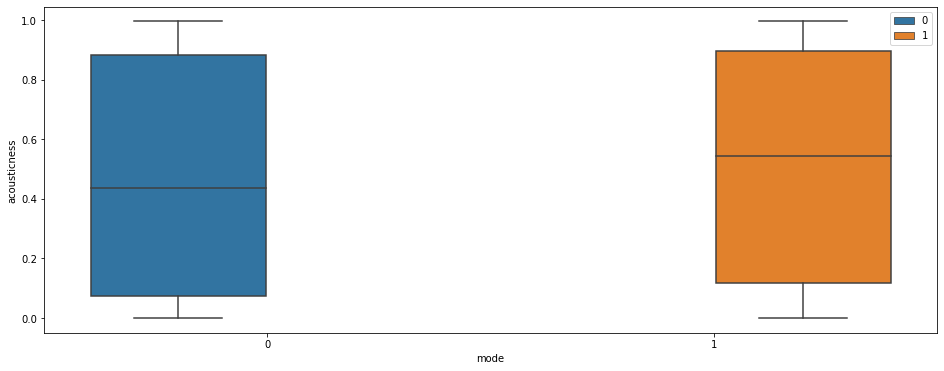

In [171]:
box_plot(df,col='acousticness')

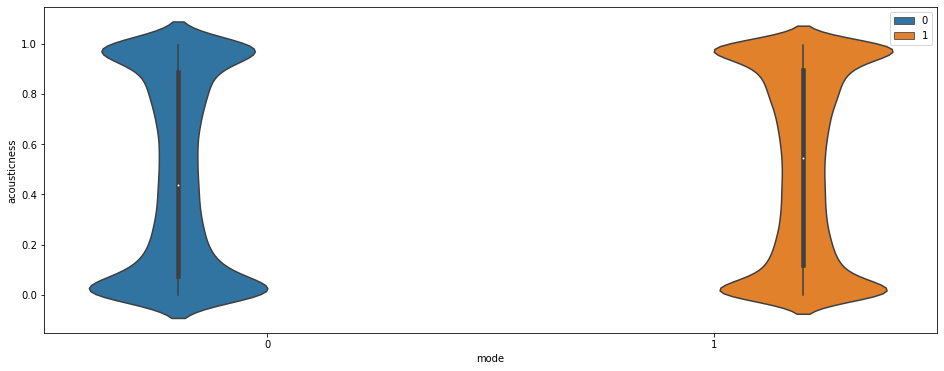

In [172]:
violin_plot(df,col='acousticness')


/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


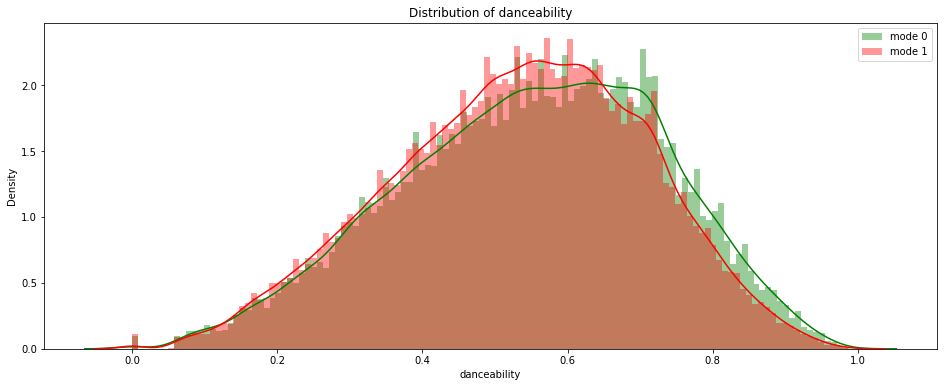

In [173]:
dist_plot_by_class(df,col='danceability')




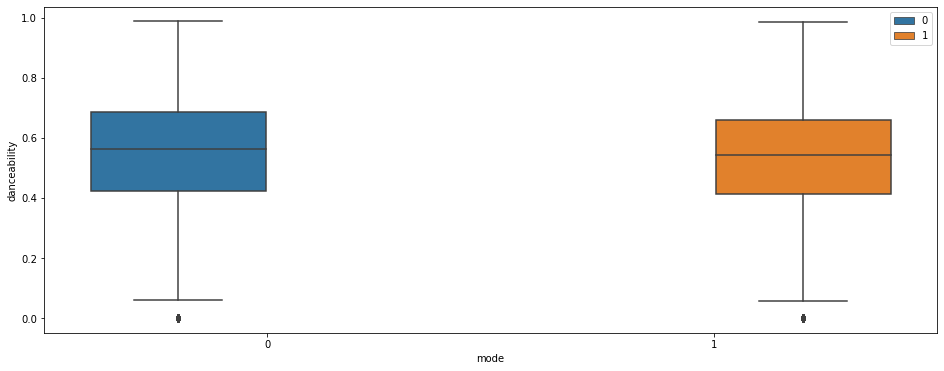

In [174]:
box_plot(df,col='danceability')

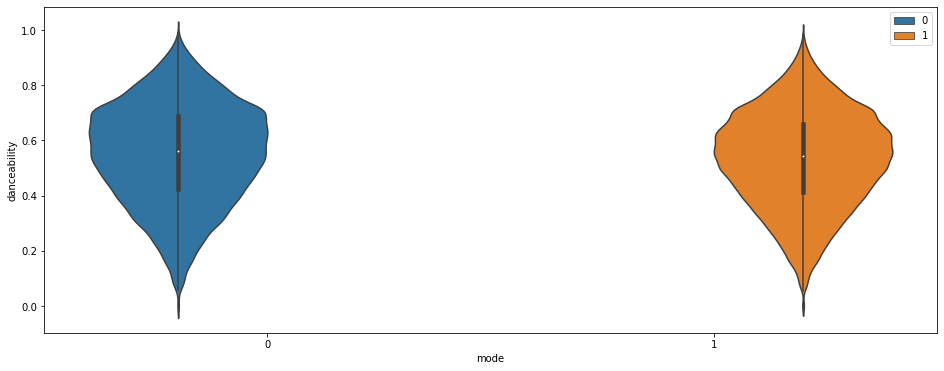

In [175]:
violin_plot(df,col='danceability')

duration_ms

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

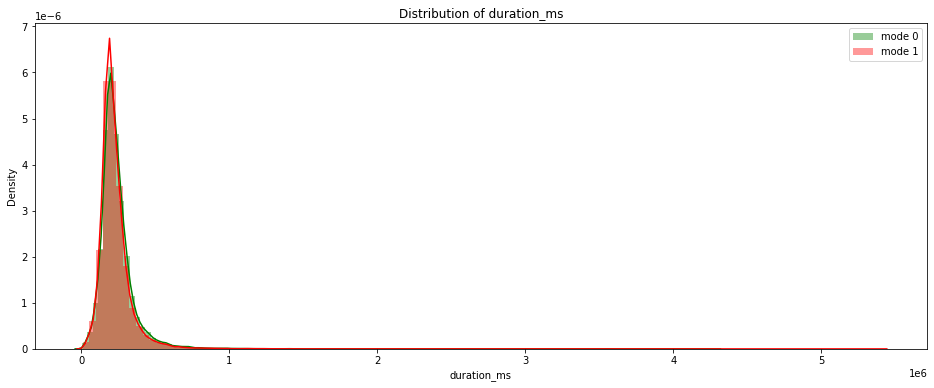

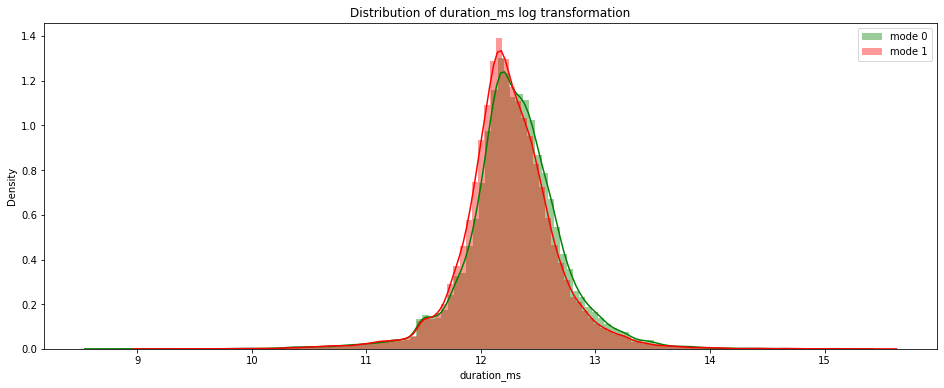

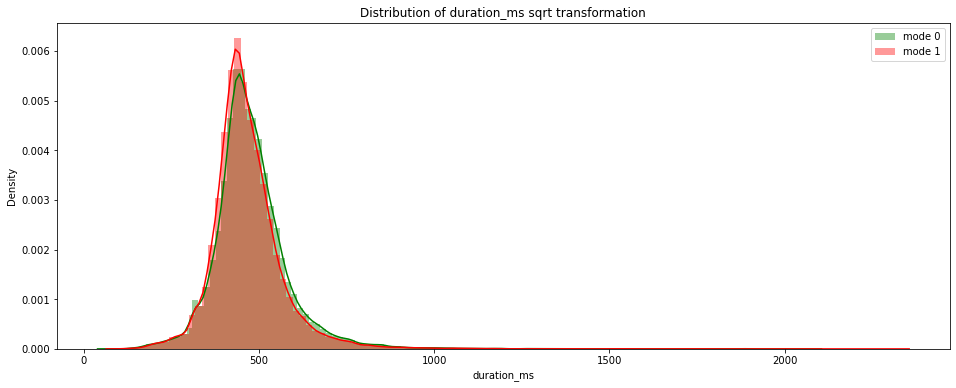

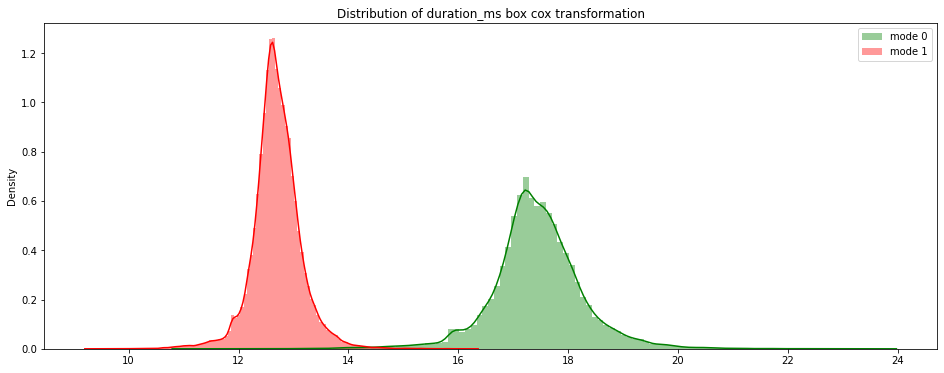

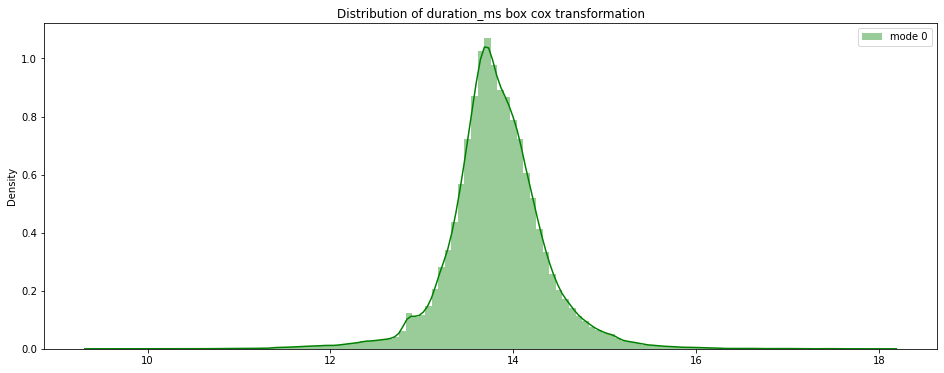

In [176]:
dist_plot_by_class(df,col='duration_ms')

dist_plot_log_by_class(df,col='duration_ms')

dist_plot_sqrt_by_class(df,col='duration_ms')

dist_plot_box_cox_by_class(df,col='duration_ms')

dist_plot_box_cox(df,col='duration_ms')

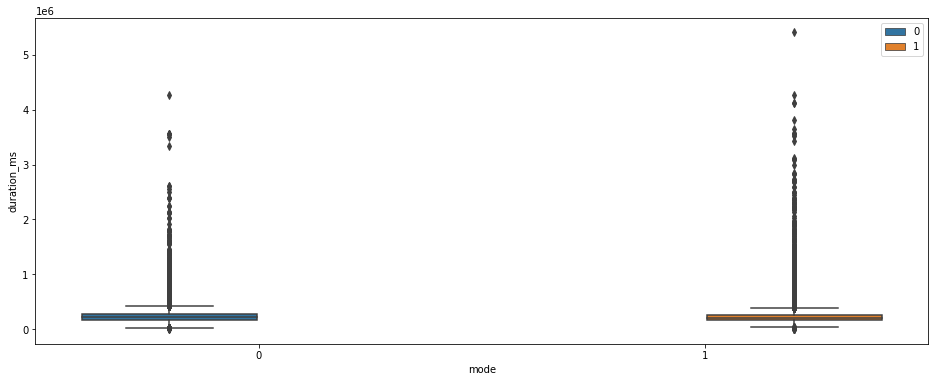

<ipython-input-164-3dea7afb9ede>:89: RuntimeWarning: divide by zero encountered in log
  sns.boxplot(data=np.log(df[[col,'mode']]),y=col,x='mode',hue='mode')


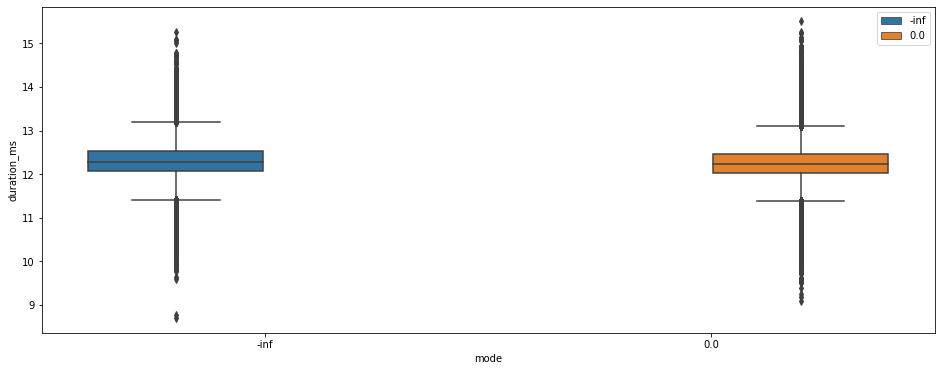

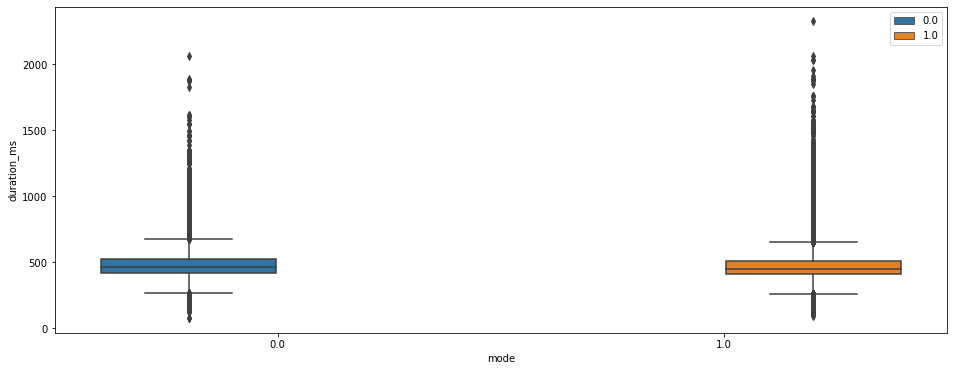

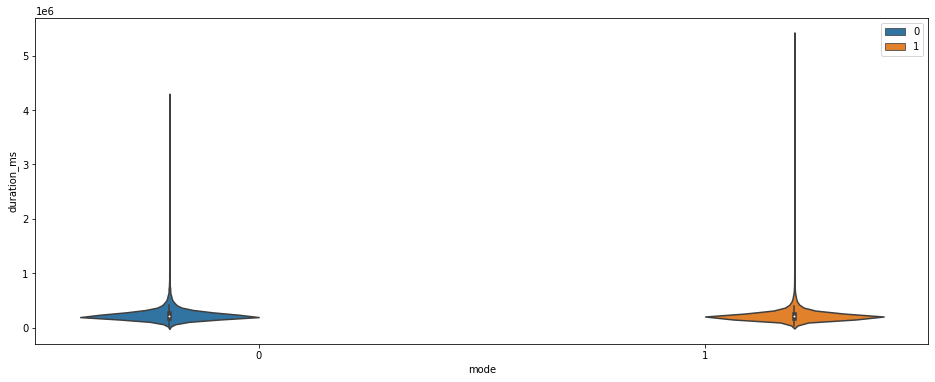

In [177]:
box_plot(df,col='duration_ms')
box_plot_log(df,col='duration_ms')
box_plot_sqrt(df,col='duration_ms')

violin_plot(df,col='duration_ms')







/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


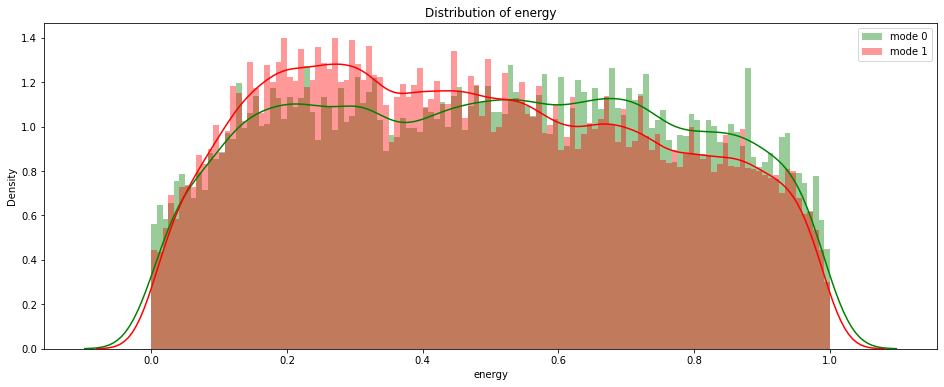

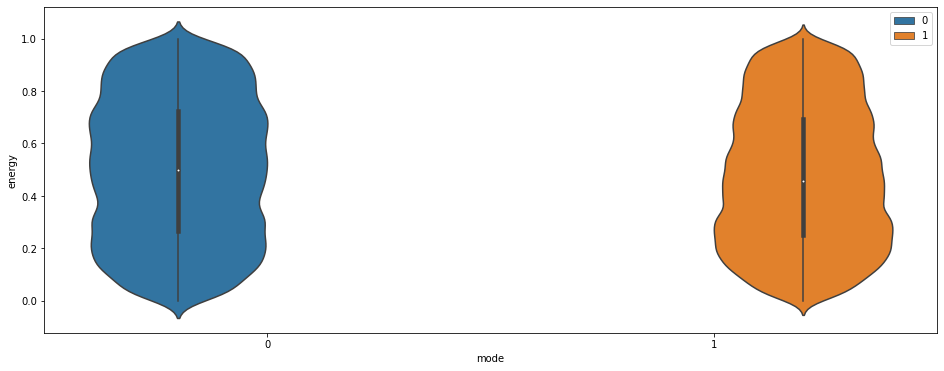

In [178]:
dist_plot_by_class(df,col='energy')

violin_plot(df,col='energy')




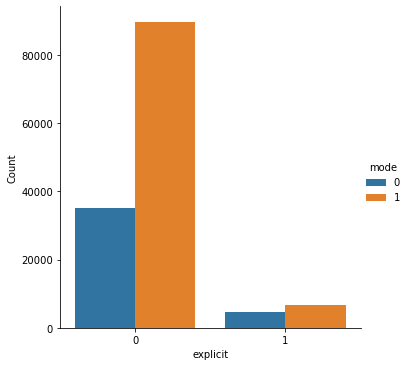

In [179]:
df_solution = df.pivot_table(index=['explicit','mode'], aggfunc='size')
df_solution = df_solution.reset_index().rename(columns={0:'Count'}).sort_values(by=['mode'])

sns.catplot(data=df_solution,y='Count',x='explicit',hue='mode',
            kind="bar")




/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


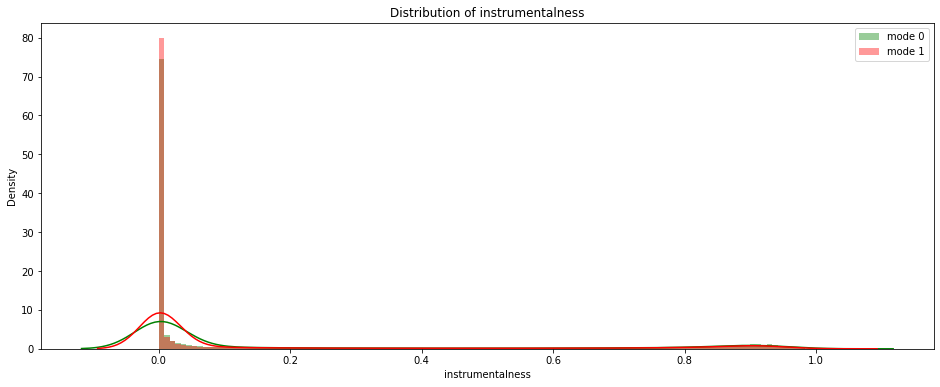

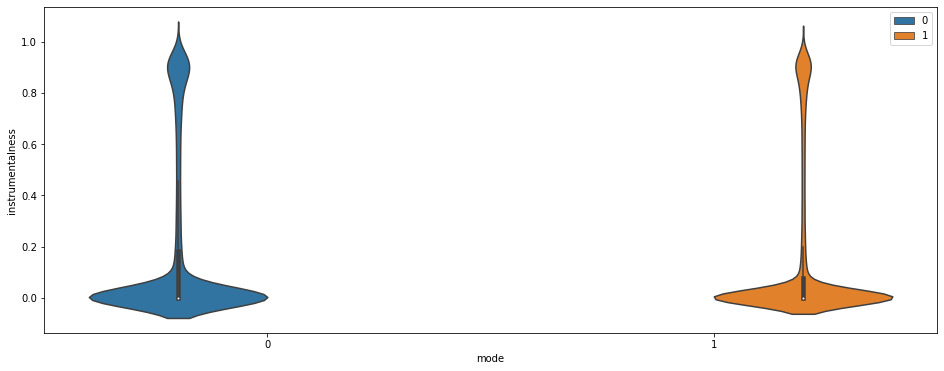

In [180]:
dist_plot_by_class(df,col='instrumentalness')
violin_plot(df,col='instrumentalness')


/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

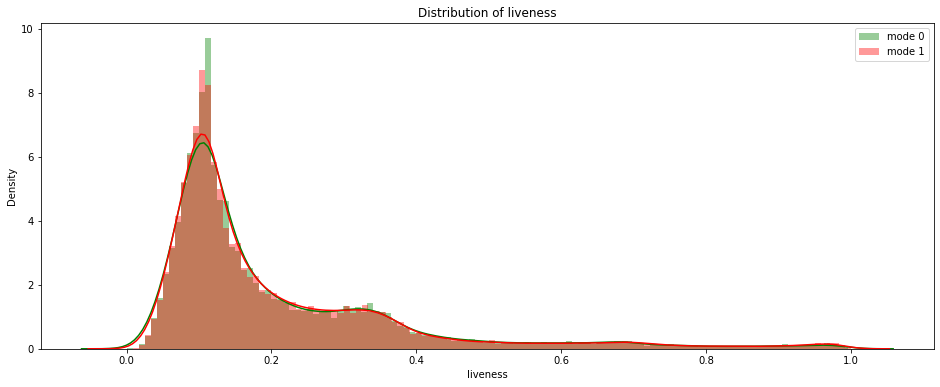

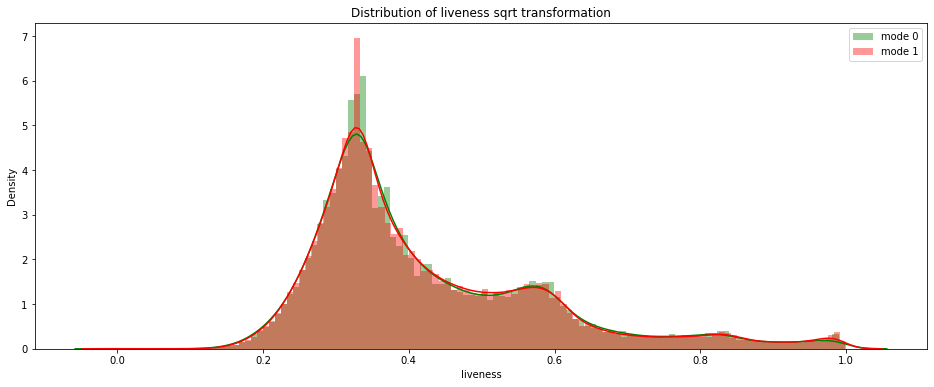

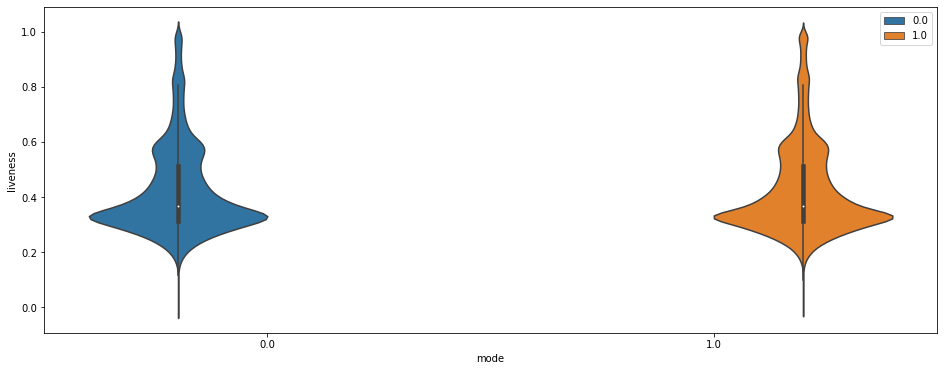

In [185]:
dist_plot_by_class(df,col='liveness')
dist_plot_sqrt_by_class(df,col='liveness')
violin_plot_sqrt(df,col='liveness')



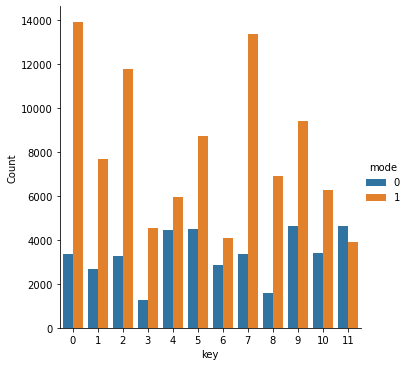

In [182]:
df_solution = df.pivot_table(index=['key','mode'], aggfunc='size')
df_solution = df_solution.reset_index().rename(columns={0:'Count'}).sort_values(by=['mode'])

sns.catplot(data=df_solution,y='Count',x='key',hue='mode',
            kind="bar")




/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

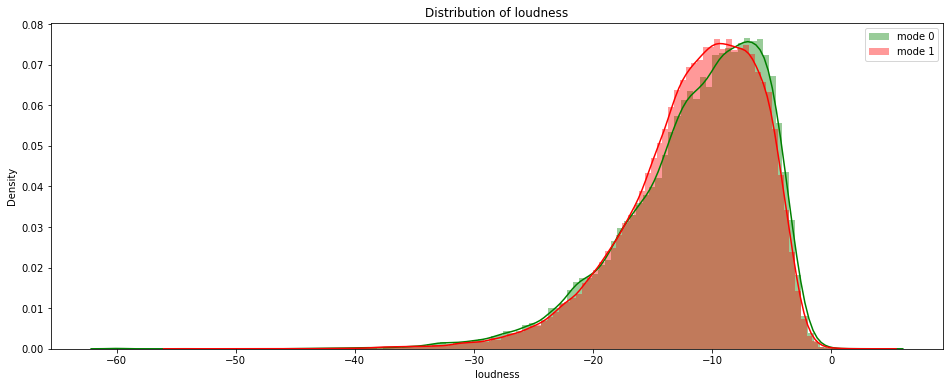

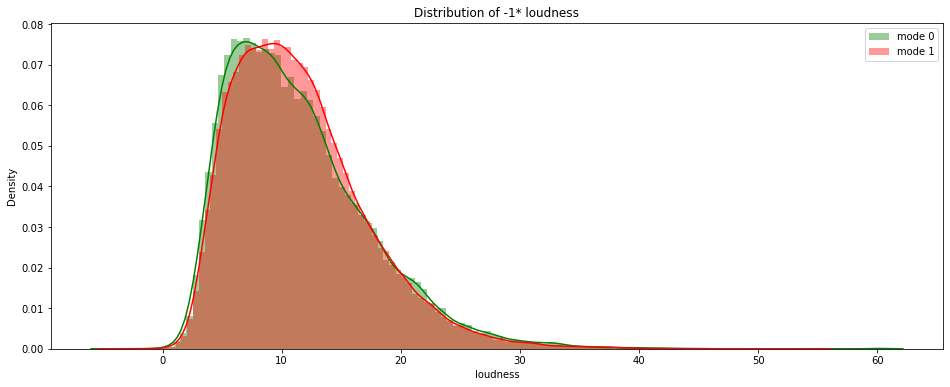

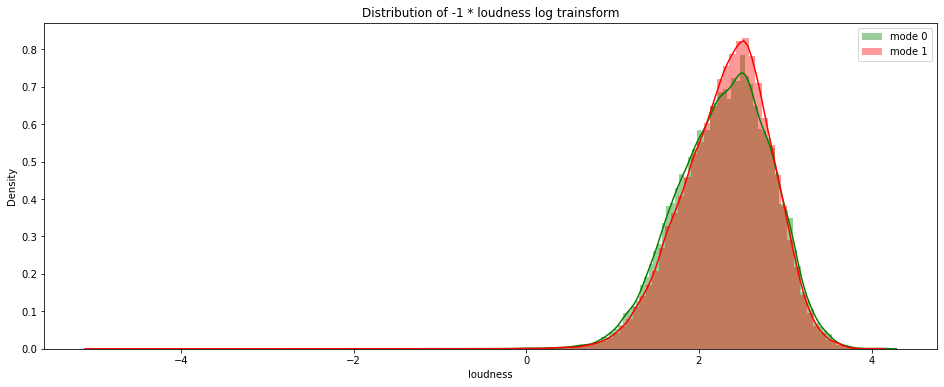

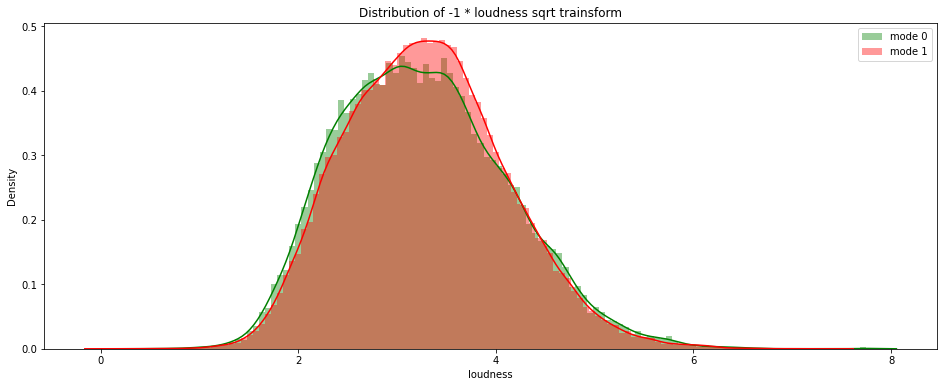

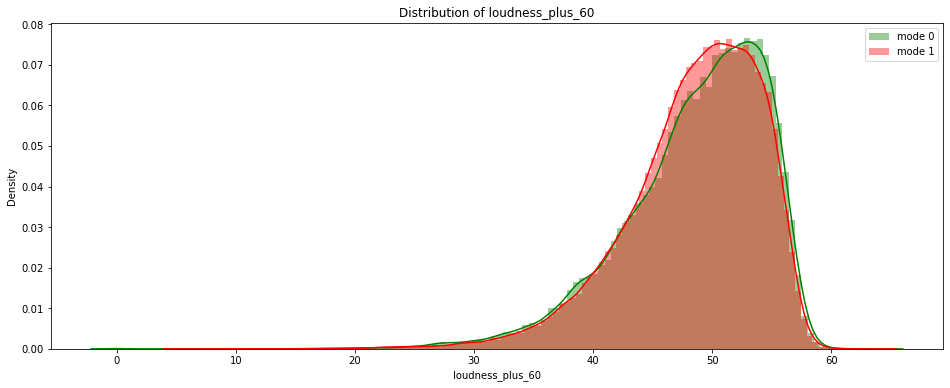

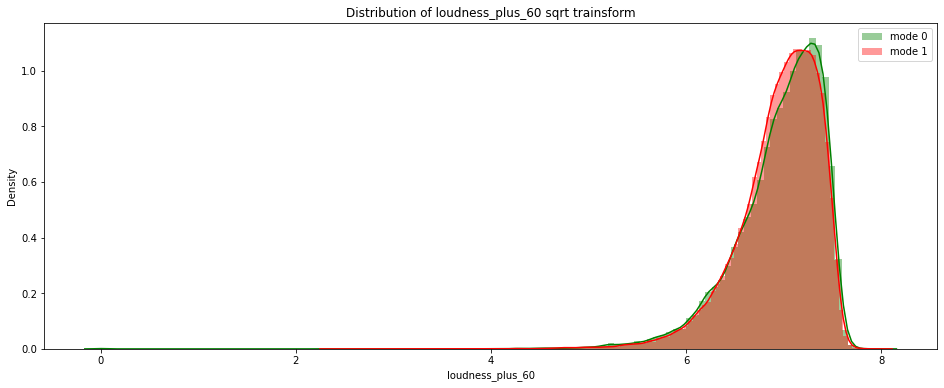

In [186]:
dist_plot_by_class(df,col='loudness')

col='loudness'
plt.figure(figsize=(16,6))

plt.title("Distribution of -1* "+col)
sns.distplot(-1*df[df['mode']==0][col],color="green", kde=True,bins=120, label='mode 0')
sns.distplot(-1*df[df['mode']==1][col],color="red", kde=True,bins=120, label='mode 1')
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.title("Distribution of -1 * "+col + " log trainsform")
sns.distplot(np.log(-1*df[df['mode']==0][col]),color="green", kde=True,bins=120, label='mode 0')
sns.distplot(np.log(-1*df[df['mode']==1][col]),color="red", kde=True,bins=120, label='mode 1')
plt.legend()
plt.show()

plt.figure(figsize=(16,6))


plt.title("Distribution of -1 * "+col+ " sqrt trainsform")
sns.distplot(np.sqrt(-1*df[df['mode']==0][col]),color="green", kde=True,bins=120, label='mode 0')
sns.distplot(np.sqrt(-1*df[df['mode']==1][col]),color="red", kde=True,bins=120, label='mode 1')
plt.legend()
plt.show()


df['loudness_plus_60'] = df[col].apply(lambda x: x+60)

plt.figure(figsize=(16,6))
col = 'loudness_plus_60'
plt.title("Distribution of "+col)
sns.distplot(df[df['mode']==0][col],color="green", kde=True,bins=120, label='mode 0')
sns.distplot(df[df['mode']==1][col],color="red", kde=True,bins=120, label='mode 1')
plt.legend()
plt.show()


plt.figure(figsize=(16,6))


plt.title("Distribution of "+col+ " sqrt trainsform")
sns.distplot(np.sqrt(df[df['mode']==0][col]),color="green", kde=True,bins=120, label='mode 0')
sns.distplot(np.sqrt(df[df['mode']==1][col]),color="red", kde=True,bins=120, label='mode 1')
plt.legend()
plt.show()


/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

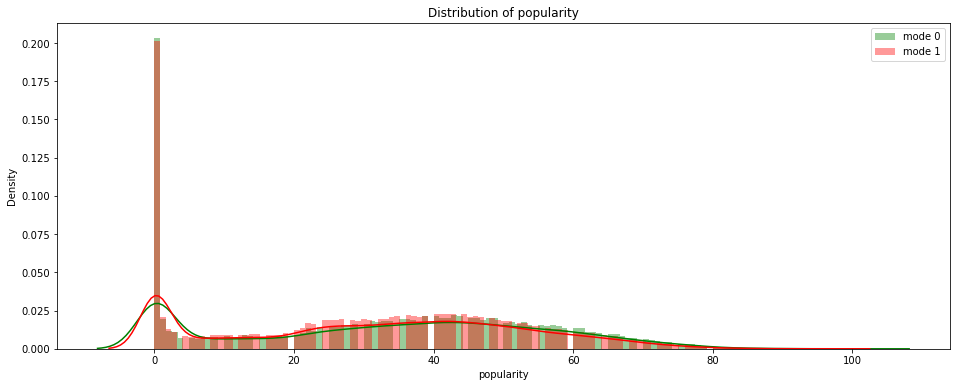

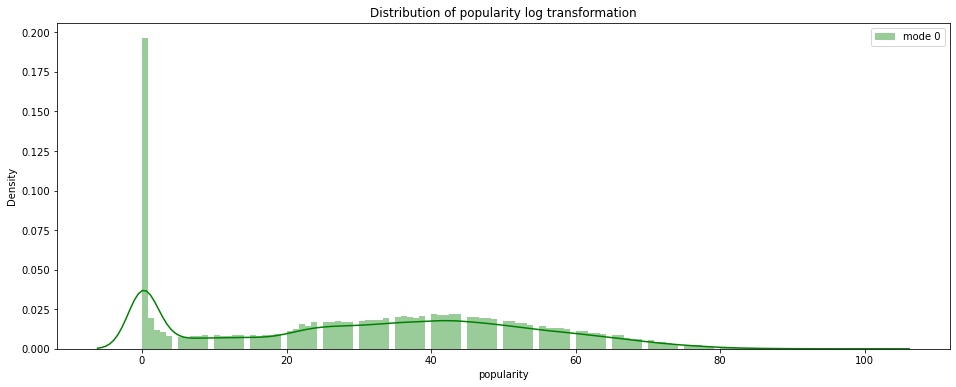

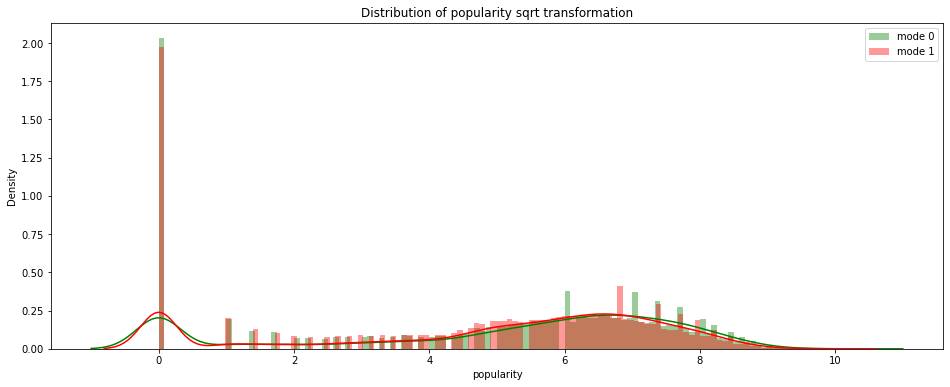

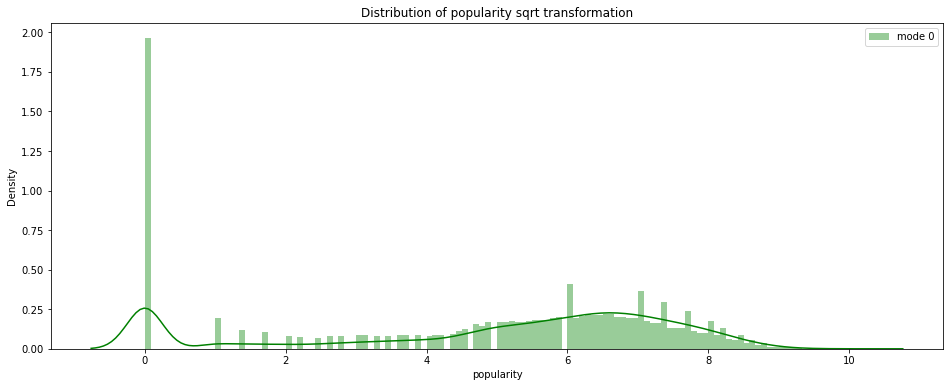

In [187]:
dist_plot_by_class(df,col='popularity')

dist_plot(df,col='popularity')

dist_plot_sqrt_by_class(df,col='popularity')

dist_plot_sqrt(df,col='popularity')


/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

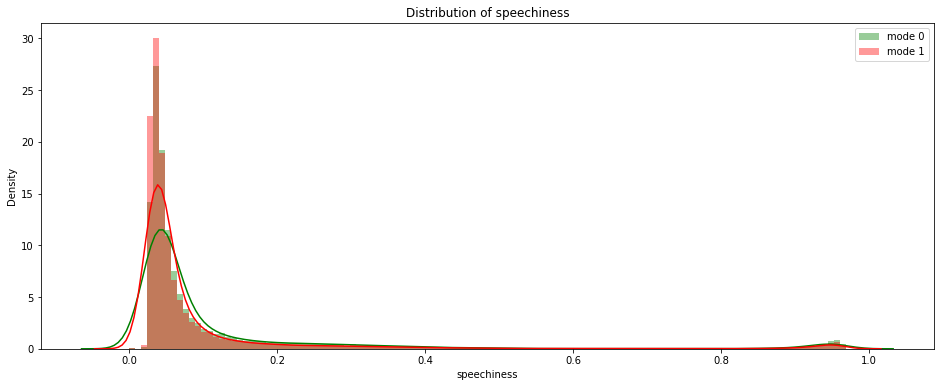

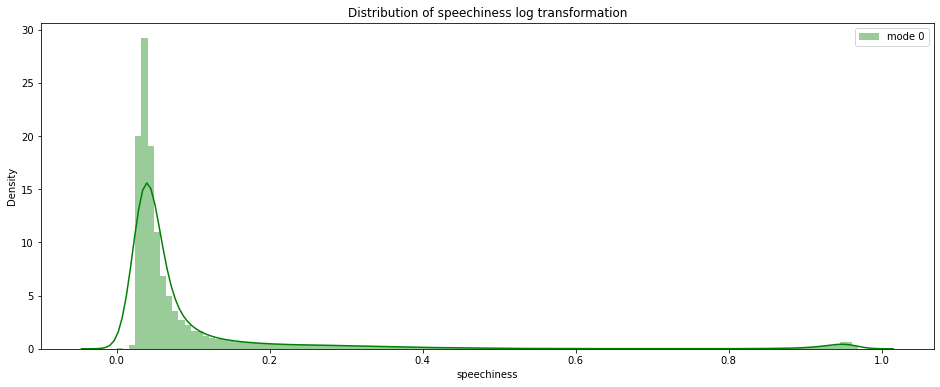

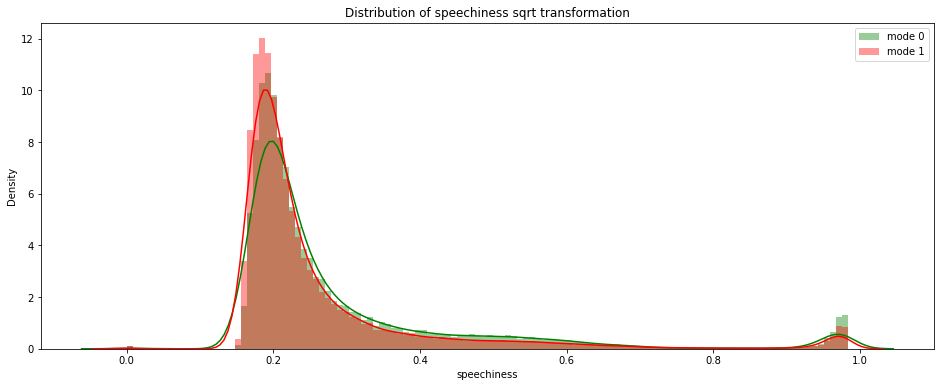

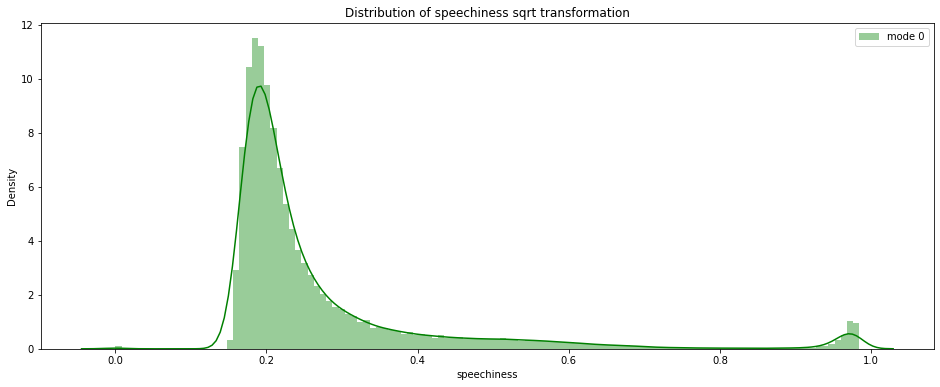

In [188]:
dist_plot_by_class(df,col='speechiness')
dist_plot(df,col='speechiness')
dist_plot_sqrt_by_class(df,col='speechiness')
dist_plot_sqrt(df,col='speechiness')

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

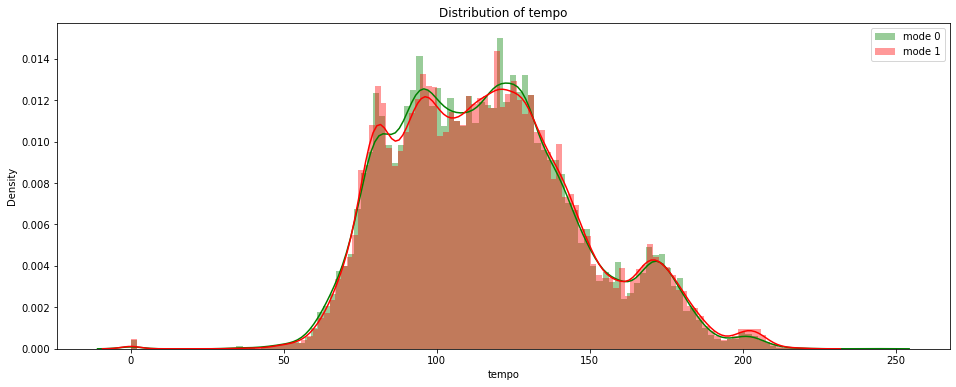

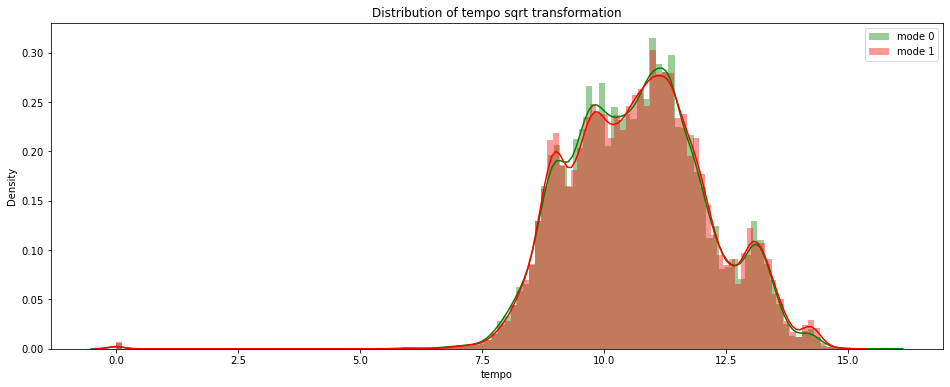

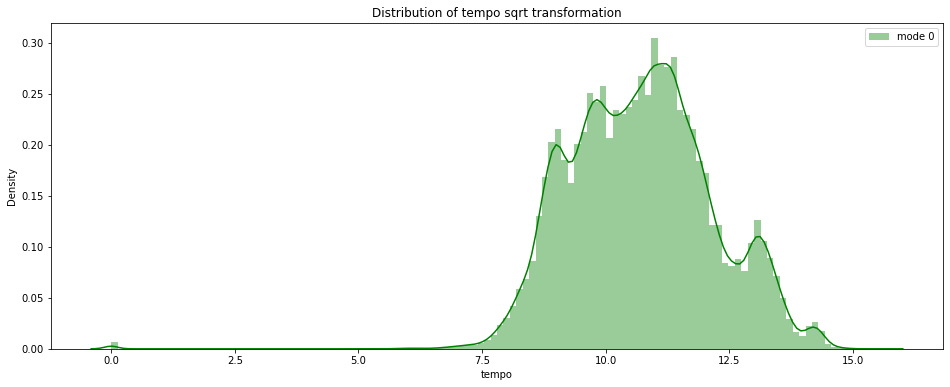

In [191]:
dist_plot_by_class(df,col='tempo')

dist_plot_sqrt_by_class(df,col='tempo')
dist_plot_sqrt(df,col='tempo')

